In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
 
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import scipy as sp 
import matplotlib as mpl 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

dataset = pd.read_csv("E:/Martina/Faculty/year 3/Second Term/Machine Learning/Sections/diabetes data/diabetes.csv")


In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
dataset.index #row

RangeIndex(start=0, stop=768, step=1)

In [7]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
dataset.shape

(768, 9)

KNN Algorithm

In [12]:
#Replace zeros 
zero_not_accepted = ['Glucose'  ,'BloodPressure' , 'SkinThickness' , 'Insulin' ,  'BMI' ]

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int (dataset[column].mean (skipna=True))
    dataset[column] = dataset[column].replace(np.NaN,mean)

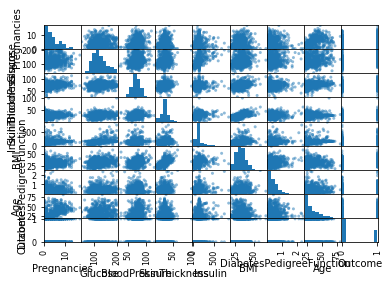

In [13]:
#Split The Dataset
pd.plotting.scatter_matrix(dataset)
x = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0 ,test_size=0.2)

In [14]:
#Feature Scaling Between(-1,1)
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [15]:
#Implmenting KNN
#import math 
#print(math.sqrt(len(y_test)))
classifier = KNeighborsClassifier(n_neighbors=11, p=2 ,metric ='euclidean')

In [16]:
#fit The Train Data
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [17]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
#Evaluate The Model
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(f1_score(y_test,y_pred))

[[94 13]
 [15 32]]
0.6956521739130436


In [19]:
accuracy = accuracy_score(y_test,y_pred)*100
print (str(accuracy) + " %")

81.81818181818183 %


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome'>

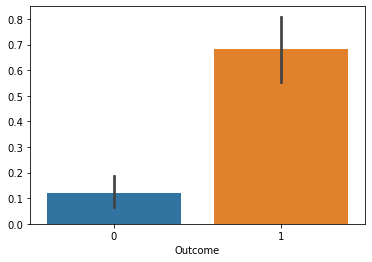

In [20]:
sns.barplot(y_test,y_pred)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

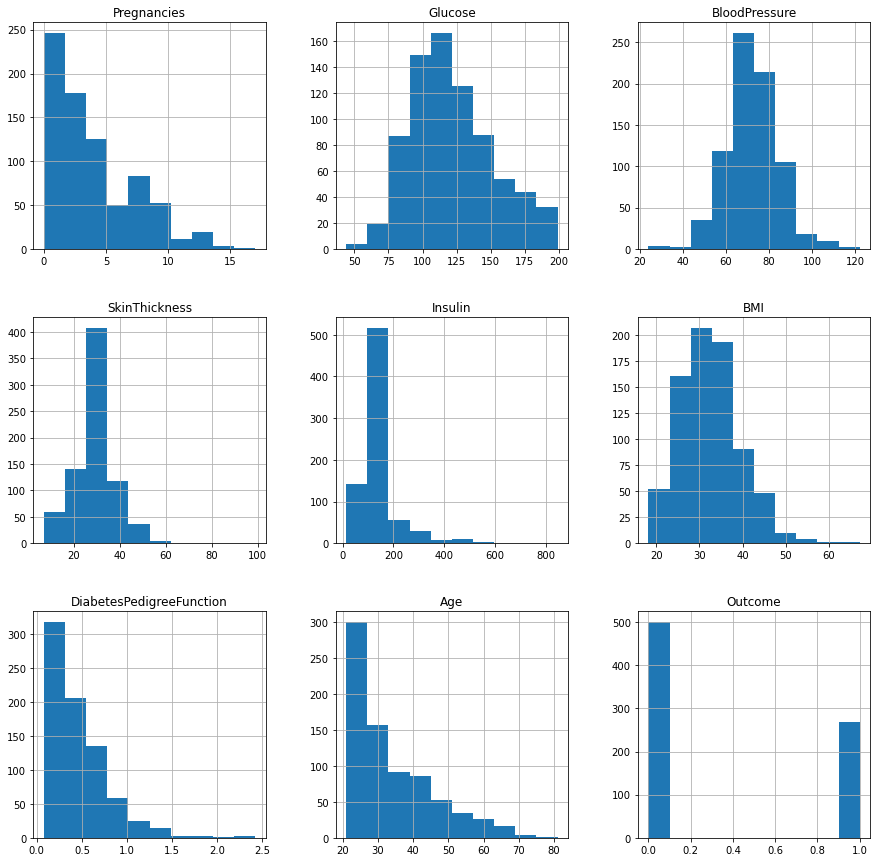

In [21]:
dataset.hist(figsize=(15,15))

Decision Tree Algorithm

73.7012987012987


C:\Users\lenovo\AppData\Local\Temp/ipykernel_16044/2273861630.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=data.drop(['Outcome'],1)


<AxesSubplot:xlabel='Outcome'>

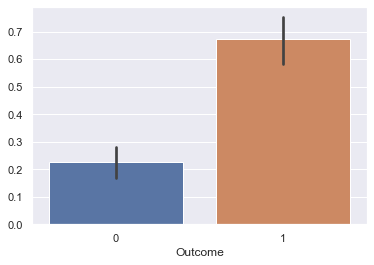

In [22]:
data[data.isnull().any(axis=1)].head()
data = data.dropna()
x=data.drop(['Outcome'],1)
y=data['Outcome']
x_train , x_test , y_train ,y_test =train_test_split(x,y,test_size=.4 ,random_state=234)
diabetes_classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
diabetes_classifier.fit(x_train,y_train)
y_predicted = diabetes_classifier.predict(x_test)
y_predicted[:10]
acc=accuracy_score(y_test ,y_predicted)*100
print(acc)
y_predicted = diabetes_classifier.predict(x_test)
sns.set(color_codes="true")
sns.barplot(x = y_test, y = y_predicted)


K-Means Algorithm

In [23]:
print(data.groupby('Outcome').size()) 

Outcome
0    500
1    268
dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

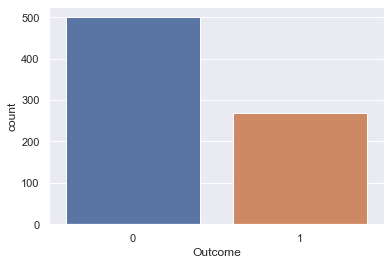

In [24]:
sns.countplot(x = 'Outcome',data = data)

In [25]:
dataset_new = data

In [26]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] =dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 


In [27]:
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [28]:
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [30]:
data1 = pd.DataFrame(dataset_scaled)
data1

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,1.0


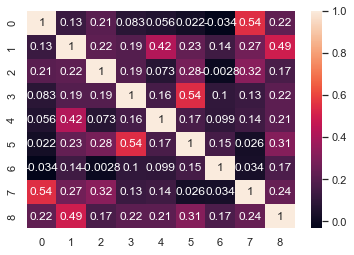

In [31]:
sns.heatmap(data1.corr(), annot = True)
plt.show()

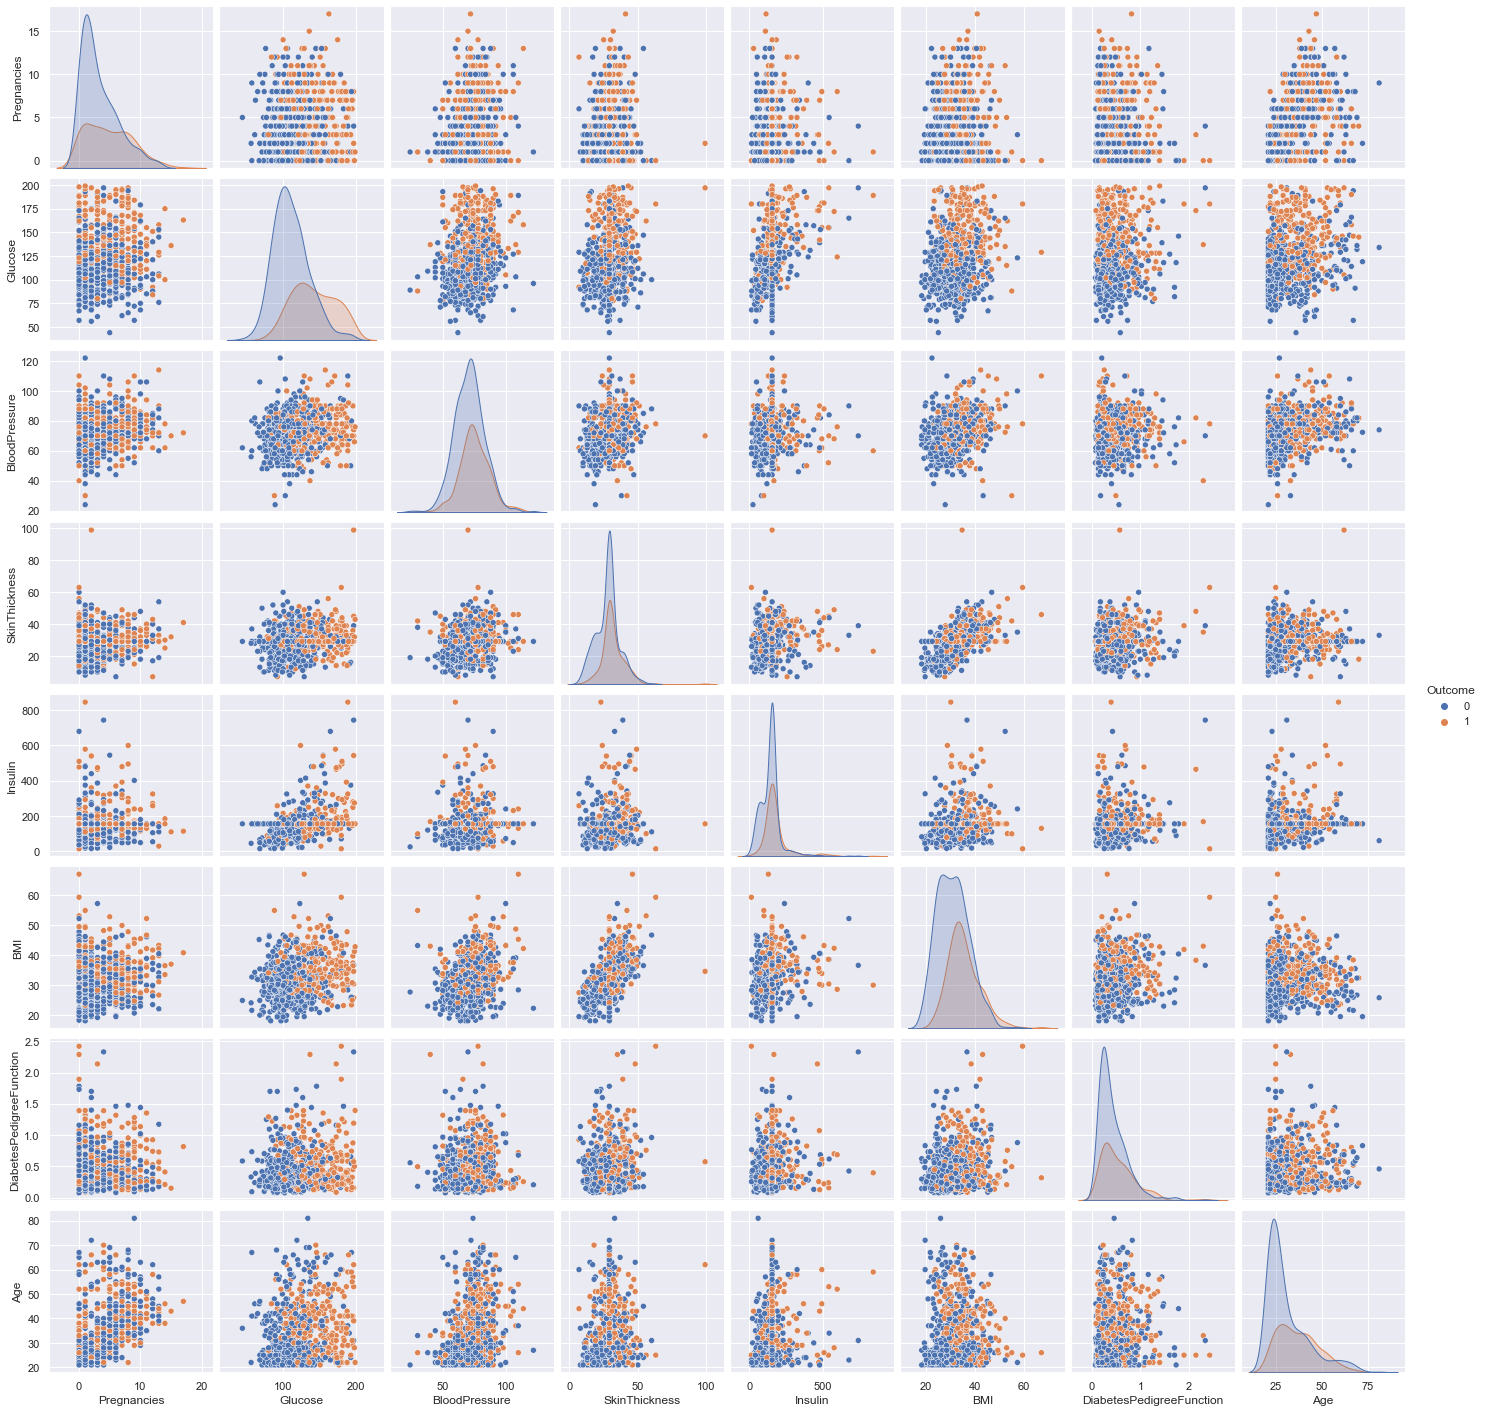

In [32]:
sns.pairplot(data=data, hue='Outcome')
plt.show()

In [33]:
X = data1.iloc[:, [1, 4, 5]].values
Y = data1.iloc[:, 8].values

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [35]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 3)
X_test shape: (154, 3)
Y_train shape: (614,)
Y_test shape: (154,)


In [38]:
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [39]:
print(KMeans_Clustering.cluster_centers_)

[[0.71411853 0.21796168 0.35414063]
 [0.38662377 0.13804041 0.25757952]]


In [40]:
kpred = KMeans_Clustering.predict(X_test)

print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test,kpred))

Classification report:

               precision    recall  f1-score   support

         0.0       0.44      0.24      0.31       100
         1.0       0.23      0.43      0.30        54

    accuracy                           0.31       154
   macro avg       0.33      0.33      0.31       154
weighted avg       0.36      0.31      0.31       154



Confusion Matrix :


<AxesSubplot:>

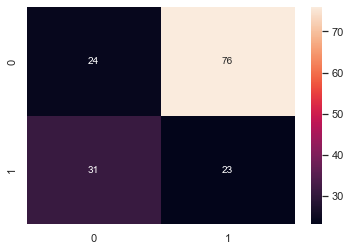

In [41]:

print("Confusion Matrix :")
outcome_labels = sorted(data.Outcome.unique())
sns.heatmap(
    confusion_matrix(Y_test, kpred),
    annot=True, 
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

In [42]:
out = KMeans_Clustering.predict([[0.53,0.54,0.5253]])
if (out==0):
    print("No Diabetes")
else:
    print("Diabetes")

No Diabetes


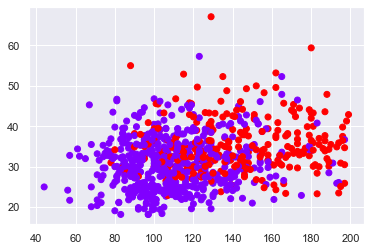

In [43]:
plt.scatter(data.iloc[:, [1]].values,data.iloc[:, [5]].values, c=data['Outcome'], cmap='rainbow')

In [44]:
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X)

KMeans(n_clusters=2, random_state=0)

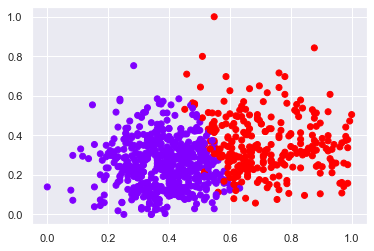

In [45]:
plt.scatter(data1.iloc[:, [1]].values,data1.iloc[:, [5]].values, c=KMeans_Clustering.labels_, cmap='rainbow')

In [46]:
acc = accuracy_score(Y_test,kpred)*100
print(acc)

30.519480519480517


Perceptron Algorithm

In [47]:
features =['Pregnancies','Glucose']
target=['Outcome']

(615, 2) (615, 1)
(153, 2) (153, 1)
Predicted: 0.0, Actual:0
Predicted: 0.0, Actual:0
Predicted: 0.0, Actual:0
Predicted: 0.0, Actual:1
Predicted: 0.0, Actual:1
Predicted: 0.0, Actual:0
Predicted: 0.0, Actual:0
Predicted: 1.0, Actual:0
Predicted: 0.0, Actual:0
Predicted: 0.0, Actual:0
Accuracy = 75.16339869281046


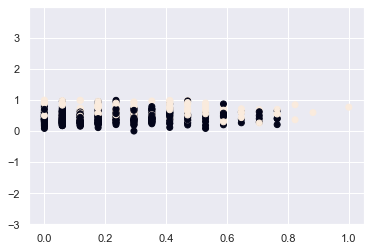

In [48]:
for column in data:
    sorted_col = data.sort_values(column)
    x_max = sorted_col[column].iloc[-1]
    x_min = sorted_col[column].iloc[0]
    range_x = x_max - x_min
    
    for i in range(data.shape[0]):
        data.loc[i, column] = (data[column][i] - x_min) / range_x
training = data.loc[:(768 * 80 // 100)]
test = data.loc[(768 * 80 // 100 + 1):]

x_training, y_training = training[features].values, training[target].values
x_test, y_test = test[features].values, test[target].values
print(x_training.shape, y_training.shape)
print(x_test.shape, y_test.shape)   
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation > 0.0 else 0.0
 
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]    # Weights[0] is bias
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]

    return weights

# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return predictions

l_rate = 0.1
n_epoch = 50
predicted = perceptron(training.values, test.values, l_rate, n_epoch)

for i in range(10):
    print(f'Predicted: {predicted[i]}, Actual:{y_test[i][0]}')
 # Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i][0] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

accuracy = accuracy_metric(y_test,predicted)
print(f'Accuracy = {accuracy}')
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(x_training[:,0],x_training[:,1],marker='o',c=y_training)
#x0_1 = np.amin(x_training[:,0])
#x0_2 = np.amax(x_training[:,0])
#x1_1 = (-predicted.weights[0]*x0_1 -predicted.bias)/predicted.weights[1]
#x1_2 = (-predicted.weights[0]*x0_2 -predicted.bias)/predicted.weights[1]
#ax.plot([x0_1,x0_2],[x1_1,x1_2],'k')
ymin =np.amin(x_training[:,1])
ymax = np.amax(x_training[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()   

Logistic Regression algorithm

In [49]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [50]:
x= dataset.drop(columns='Outcome', axis='presence')
y=dataset['Outcome']

In [51]:
print (y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y  ,random_state = 42)


In [53]:
print(x.shape , x_train.shape , x_test.shape)

(768, 8) (537, 8) (231, 8)


In [54]:
model = LogisticRegression()

In [55]:
model.fit(x_train , y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
x_train_pred= model.predict(x_train)
acc= accuracy_score(x_train_pred, y_train)

In [57]:
print("Train set accuracy: {:.2f}".format(acc))

Train set accuracy: 0.79


In [58]:
x_test_pred= model.predict(x_test)
acc= accuracy_score(x_test_pred, y_test)

In [59]:
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.74


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

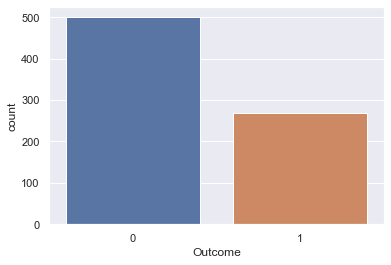

In [60]:
sns.countplot(data['Outcome'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

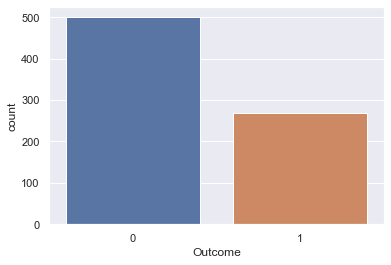

In [61]:
sns.countplot(data['Outcome'])


Data visualization

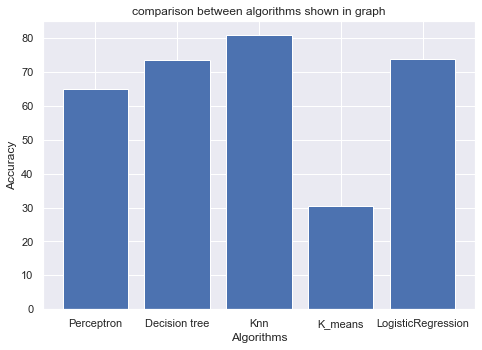

In [62]:
fig=plt.figure()
ax=fig.add_axes([1,1,1,1])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("comparison between algorithms shown in graph")
Algorithms=['Perceptron' , 'Decision tree' ,'Knn' ,'K_means' ,'LogisticRegression']
Accuracy=[65,73.7,81,30.5,74]
ax.bar(Algorithms, Accuracy)
plt.show()

In [63]:
print("Highest Accuracy Algorithm: KNN Algorithm With accuracy 81%")


Highest Accuracy Algorithm: KNN Algorithm With accuracy 81%
